# General data reader for AQUA 
## Additional data sources

We added a few new data sources to the intake catalogue, pointing to resources already available at DKRZ.

### MSWEP precipitation data

MSWEP is a high-quality and very high resolution (5km) dataset available [here](http://www.gloh2o.org/mswep/). We download the MSWEP data archive to be used to provide an observational reference dataset for precipitation. Data are available at 3hourly, daily and monthly time resolutions.

In [1]:
import sys
sys.path.append("../..")  # hack to import module -- to be removed later

from aqua import Reader, catalogue

In [3]:
reader = Reader(model="MSWEP", exp="past", source="monthly")

(there is also a "monthlyz" source, which is an experimental zarr version mapped with kerchunk)

In [4]:
data = reader.retrieve()

precipitation: corrected multiplying by density of water 1000 kg m-3
precipitation: incommensurate units converting mm month-1 to kg m-2 s-1 --> dimensionless


The fixer (on by default) has renamed the MSWEP `precipitation` variable to `pr` and converted it to SI units (it was monthly cumulated precipitation).

In [5]:
data.pr

<xarray.DataArray 'pr' (time: 502, lat: 1800, lon: 3600)>
dask.array<mul, shape=(502, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * time     (time) int32 28885 28913 28944 28974 ... 44042 44073 44103 44134
Attributes:
    units:         kg m-2 s-1
    target_units:  kg m-2 s-1
    factor:        3.802570537683474e-07
    offset:        0
    src_units:     mm month-1
    units_fixed:   1

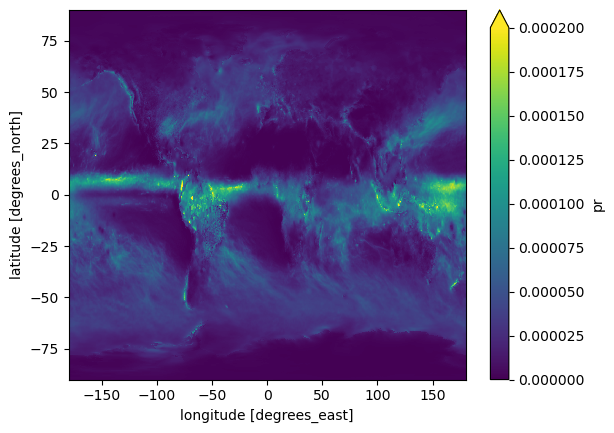

In [6]:
data.pr.isel(time=[0,1,2,3]).mean("time").plot(vmin=0, vmax=0.0002)

(502, 1800, 3600)


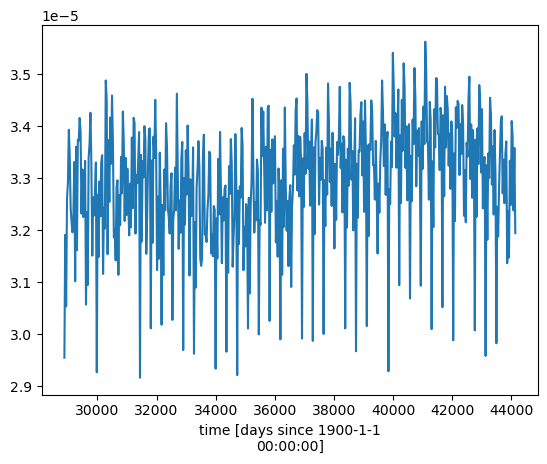

In [10]:
reader.fldmean(data.pr).plot()

### Experimental access to an external intake-esm catalogue (the Dyamond-Nextgems catalogue)

This is to test direct access through the reader to data which are indexed through an externa intake-esm (not intake) catalogue. The idea is still the same: we include it in our intake catalogue, but we also add already some search parameters. Please check the "intake-esm-test" source in ngc2009.yaml.

In [1]:
from aqua import Reader, catalogue
reader = Reader(model="ICON", exp="ngc2009", source="intake-esm-test")
data = reader.retrieve()

No fixes defined for model  ICON


(99, 20971520)


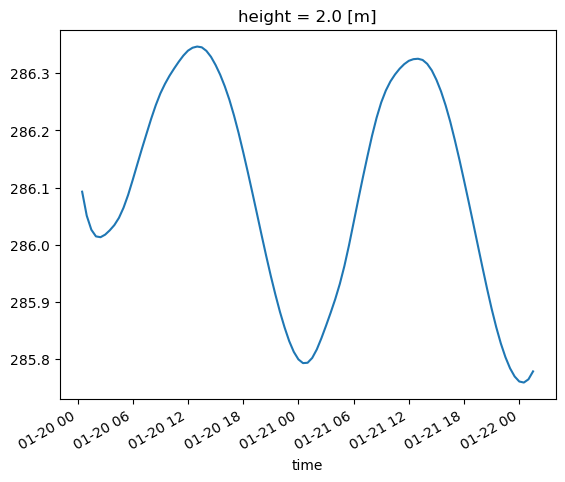

In [3]:
tas1 = data.tas[1:100,0,:]
global_mean = reader.fldmean(tas1)
global_mean.plot()

### Access to ERA5 data

The intake-esm functionality allows us also to access the ERA5 data on levante. Variables have been split for now in two sources ("monthly_inst" for instantaneous variables and "monthly_acc" for fluxes)

In [7]:
from aqua import Reader
reader = Reader(model="ERA5", exp="era5", source="monthly_inst")
data = reader.retrieve()

/home/b/b382075/mambaforge/envs/aqua2/lib/python3.10/site-packages/intake_esm/utils.py:96: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(catalog_path, **csv_kwargs), catalog_path


In [15]:
data.t2m

<xarray.DataArray 't2m' (time: 516, values: 542080)>
dask.array<concatenate, shape=(516, 542080), dtype=float32, chunksize=(1, 542080), chunktype=numpy.ndarray>
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2021-12-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
    latitude    (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude   (values) float64 dask.array<chunksize=(542080,), meta=np.ndarray>
    valid_time  (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: values
Attributes: (12/21)
    GRIB_paramId:                    167
    GRIB_dataType:                   an
    GRIB_numberOfPoints:             542080
    GRIB_typeOfLevel:                surface
    GRIB_stepUnits:                  1
    GRIB_stepType:                   avgua
    ...                              ...
    GRIB_shortName:                  2t
    GRIB_totalNumber:                0
    GRIB_units:                      K
    long_name:                       2 metre temperature
    units:                           K
    standard_name:                   unknown

(516, 542080)


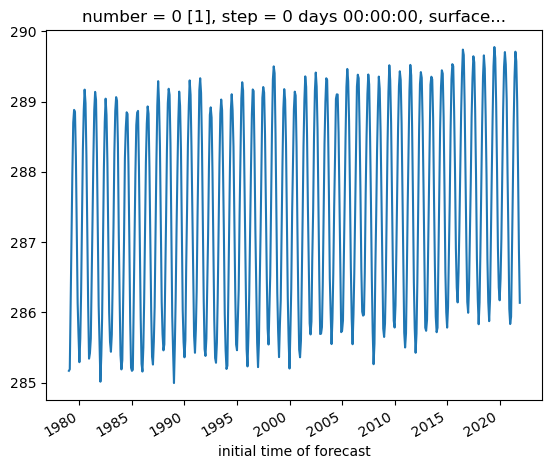

In [16]:
global_mean = reader.fldmean(data.t2m)
global_mean.plot()